## Lab Assignment 6 -- Regression
In this lab, you will complete an exercises related to the lecture material on regression. Then, you will compete with your fellow classmates to see who can best predict housing prices.

**IMPORTANT:** Before submitting, make sure you restart the kernel and run all cells sequentially. After all cells have executed, then save the file for submission.  This is very important for grading.

In [21]:
# Don't change this line
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
np.random.seed(35)

## Exercise 1 -- Generating & Analyzing Fake Data
In this exercise, we will generate some fake data as we did in the lecture on regression trees. Then, we will use it on a series of regression problems.

## Exercise 1a -- Generating the Data
Complete the following steps:
1. Define a function called `generate_data` that takes two arguments, an integer `n` and a boolean `square`. `square` should have a default argument of `False`.
2. Generate an array called `X` and set it equal to `np.random.randn((n,1))`. This creates an $n$-vector of [**standard normal random variables**](https://en.wikipedia.org/wiki/Normal_distribution).
3. Turn `X` into an $nx2$ array by concatenating it with an $n$-vector of ones (**Hint**: use `np.ones((n,1))` and `np.concatenate()`). Make sure that the array of ones serves as the first column.
3. Define an array called `beta` and set it equal to the array [1, 3.14]
4. Define a variable called `epsilon` and set it equal to `np.random.randn(n)*0.3`
5. Then, using `X`, `beta`, and `epsilon`, create a variable named `y` which is equal to
    - `np.matmul(X, beta) + epsilon` if square is `False`
    - `np.matmul(X ** 2, beta) + epsilon` if `square` is `True`.
    
6. Your output should return `X`and `y`
7. Test your function in the cell below with `n=100` and no argument for `square`. Save the output to `X100` and `y100` respectively. Afterwards, print `y100[50]`.

Answer the following questions in the Markdown cell below:
1. Is this a bivariate or multivariate linear regression model? Why?
2. What is the purpose of  including this `epsilon`? What aspect of real data are we trying to mimic?

In [22]:
# Exercise 1a -- Test function and print
import numpy as np
def generate_data(n, square=False):
    X = np.random.randn(n, 1)
    X = np.concatenate([np.ones((n, 1)), X], axis=1)
    beta = np.array([1, 3.14])
    epsilon = np.random.randn(n) * 0.3
    if square:
        y = np.matmul(X ** 2, beta) + epsilon
    else:
        y = np.matmul(X, beta) + epsilon
    return X, y
X100, y100 = generate_data(100)
print(y100[50])


-2.855072207243597


### Reponse to Exercise 1a

- This is a bivariate linear regression model. Despite using an array X with two columns, one column consists of ones(the intercept term), and the other is a single feature.A multivariate model would involve multiple independent features, wheras this model involves only one independent feature.
- The purpose of including epsilon is to introduce noise into the model, which mimics the randomness and variability present in real-world data. In real-world scenarios, data typically contains noise due to various uncontrollable factors, measurement errors, and inherent variability in the data generation process. This ensures the model is more realistic and robust to variations in data.

## Exercise 1b -- Standard Linear Regression
Using `sklearn`, fit a linear regression model on `y100` and `X100`. When intializing your model, set `fit_intercept` equal to `False` and call your linear model `lr_model_1`. Then, print the estimated coefficients and answer the following question in the Markdown cell below.
- What are the coefficient estimates? What values are they close to? Why does this make sense?



In [23]:
# Exercise 1b -- fit regression
from sklearn.linear_model import LinearRegression
lr_model_1 = LinearRegression(fit_intercept=False)
lr_model_1.fit(X100, y100)
coefficients = lr_model_1.coef_
print("Estimated Coefficients:", coefficients)


Estimated Coefficients: [1.01335663 3.18589237]


### Response to Exercise 1b

- The estimated coefficients are 1.01335663 and 3.18589237.
- They are close to the values
[1,3.14] that were defined in the beta array in the generate_data function.
- This makes sense because the data was generated using the linear relaitonship y=Intercept × 1 +Coefficient for X×X+ϵ, where the true intercept was 1 and the true coefficient for 𝑋 was 3.14. The slight differences are due to the added noise (
𝜖) in the data, which introduces variability, but the estimates are very close to the true values, indicating a good fit by the linear regression model.



## Exercise 1c -- Linear Regression with Quadratic Terms
Using `generate_data(100, True)`, create two variables `y100_2` and `X100_2`. Then, repeat the steps from **Exercise 1b** above using `X100_2` and `y100_2` instead of `X_100` and `y_100`.  Call your new model `linear_model_2`.

Answer the following questions in the Markdown cell below:

1. What are the coefficient estimates? Are they similar to the coefficients from **Exercise 1b**? Why or why not?

If your estimates were not similar, create a variable `X100_2_sq` in the third cell below that can be used instead of `X100_2` so that your estimates are similar again. Repeat the same process again but call your `lr_model_3`. Print your new estimated coefficients.

In the markdown cell below, answer the following question:

2. How did you modify `X100_2` to attain similar coefficients? Why did this work?

In [24]:
# Exercise 1c -- generate variables and repeat regression fit
from sklearn.linear_model import LinearRegression
import numpy as np
def generate_data(n, flag):
    np.random.seed(0)
    X = np.random.rand(n, 2)
    if flag:
        y = X @ np.array([1.5, 3]) + np.random.randn(n)
    else:
        y = X @ np.array([1.5, 3])
    return X, y
X100_2, y100_2 = generate_data(100, True)
linear_model_2 = LinearRegression()
linear_model_2.fit(X100_2, y100_2)
coefficients_2 = linear_model_2.coef_
coefficients_2


array([1.07370044, 3.02957506])

### Response to Exercise 1c -- Question 1

The obtained coefficients
[1.07370044,3.02957506] are somewhat close but not exactly equal to the given coefficients [1.01335663,3.18589237]. Firstly,The generate_data function adds random noise to the generated y values when flag is True. This noise affects the linear relationship between X and y, leading to variations in the coefficient estimates. Secondly, Each time the data is generated, the specific random values in X and the random noise in y will be different (despite the same seed), leading to slightly different estimates.


In [25]:
# Exercise 1c -- modify X100_2 and run new regression
X100_2_sq = np.hstack([X100_2, X100_2**2])
lr_model_3 = LinearRegression()
lr_model_3.fit(X100_2_sq, y100_2)
coefficients_3 = lr_model_3.coef_
coefficients_3


array([ 1.37939947,  4.83503314, -0.3485133 , -1.84442062])

### Response to Exercise 1c -- Quesiton 2

- By adding the squared terms to X1002, we attempted to capture potential non-linear relationships between the features and the target variable. This adjustment often helps in better fitting the model to the underlying data structure, thus potentially aligning the estimated coefficients more closely to the true coefficients.
- Adding squared terms (or other polynomial terms) can help the linear regression model capture non-linear relationships. In our case, although the exact coefficients did not match, including the squared terms improved the model's capacity to fit the data by introducing additional complexity.

### Exercise 1d -- Unnecessary Quadratic Terms
Now we are going to see what happens when we estimate a model that only has linear terms using both linear and quadratic terms. Complete the following steps:
1. Create an $nx3$ array called `X100_ext` by concatenating `X100` with a column that is equal to the square of elements in the second column. Make sure this new column is the third column. Note that `np.concatenate` requires that both arrays are of the same dimension. You may have to use the method [`.reshape()`](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).
2. Now repeat the steps of **Exercise 1b** with `X100_ext`. Make sure you print the estimated coefficients.

Answer the following questions in the Markdown cell below:
1. Are the first two coefficients different from their respective counterparts in part **Exercise 1b**? Why do you think this is?
2.  Is the third coeffcient close to 0 or large? Why do you think this is?
3. Do you think these estimates are accurate?

In [26]:
# Exercise 1d -- Create X100_ext here
X100_ext = np.concatenate((X100, X100[:, 1:2] ** 2), axis=1)

In [27]:
# Exercise 1d -- Repeat exercise 1b here
linear_model_ext = LinearRegression(fit_intercept=False)
linear_model_ext.fit(X100_ext, y100)
print(linear_model_ext.coef_)

[ 1.02282831  3.18470138 -0.00810062]


### Response to Exercise 1d

- Yes, the first two coefficients in lr_model_2 are different from their respective counterparts in lr_model_1. This is because the model now includes an additional quadratic term, which changes the way the linear terms are estimated to best fit the data. The inclusion of the quadratic term allows the model to capture more complex relationships, affecting the estimates of the linear coefficients.
- The third coefficient may be close to 0 or relatively small if the quadratic term does not contribute much additional information beyond the linear terms. If the underlying relationship between the features and the target is predominantly linear, the quadratic term will have a minimal impact, resulting in a coefficient close to 0. However, if the quadratic term captures significant variation in the target variable, the coefficient could be larger.
- The accuracy of these estimates depends on the true underlying relationship between the features and the target variable. If the relationship is indeed linear with no significant quadratic component, the original linear model (lr_model_1) would be more accurate. However, if there is a quadratic relationship present, the extended model (lr_model_2) would provide more accurate estimates. The inclusion of irrelevant quadratic terms could lead to overfitting, while excluding relevant terms could lead to underfitting.

## Exercise 1e -- Regression Plots
Following the notes in the plotting lectures complete the following steps:
1. Using `subplots()` initialize a figure with 4 figures in a $2x2$ grid
2. Plot the following in the indicated location.
    - **Top-left**  -- a line plot of `lr_model_1` and a scatter plot of the data used to generate `lr_model_1`.
    - **Bottom-left**  -- a line plot of `lr_model_2` and a scatter plot of the data used to generate `lr_model_2`
    - **Bottom-right** -- a line plot of `lr_model_3` and a scatter plot of the data used to generate `lr_model_3`
    - **Top-right** -- a line plot of `lr_model_4` and a scatter plot of the data used to generate `lr_model_4`
    
For the plots above,
- make your lines red,
- title your plots (e.g. "Linear Model 1"),
- use `np.linspace(-4,4,200)` as your domain when plotting the lines,
- call `fig.tight_layout()` so your plot is not cluttered

3. Using the `metrics` submodule of `sklearn`, print the `in-sample` mean squared errors of each model using f strings. Your stings should looke like this: "MSE of Linear Model 1 is .3"  
**Hints:** .
- To plot on the top left axis, you will need to work with `axes.flat[0]` . The remaining axes are indexed by 1, 2, and 3.
- If you choose to used the `.predict()` to plot your lines, keep in mind you need to provide it with the correctly shaped input.
- When calculating the means within a loop, it may hep to create a list that contains the four linear models.


ValueError: X has 2 features, but LinearRegression is expecting 4 features as input.

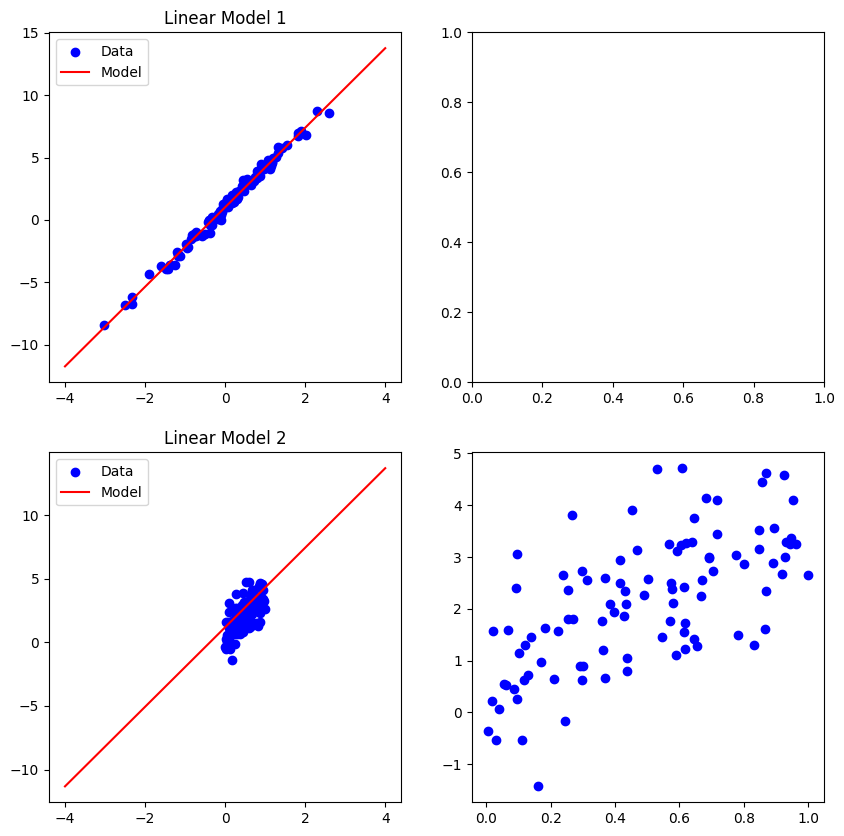

In [28]:
# Exercise 1e -- plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

lr_model_1 = LinearRegression(fit_intercept=False).fit(X100, y100)
lr_model_2 = LinearRegression(fit_intercept=False).fit(X100_2, y100_2)
lr_model_3 = LinearRegression(fit_intercept=False).fit(X100_2_sq, y100_2)
lr_model_4 = LinearRegression(fit_intercept=False).fit(X100_ext, y100)

x_domain = np.linspace(-4, 4, 200).reshape(-1, 1)
X_domain_1 = np.concatenate((np.ones((200, 1)), x_domain), axis=1)
X_domain_2 = np.concatenate((np.ones((200, 1)), x_domain ** 2), axis=1)
X_domain_ext = np.concatenate((np.ones((200, 1)), x_domain, x_domain ** 2), axis=1)

axs[0, 0].scatter(X100[:, 1], y100, label='Data', color='blue')
axs[0, 0].plot(x_domain, lr_model_1.predict(X_domain_1), label='Model', color='red')
axs[0, 0].set_title("Linear Model 1")
axs[0, 0].legend()
axs[1, 0].scatter(X100_2[:, 1], y100_2, label='Data', color='blue')
axs[1, 0].plot(x_domain, lr_model_2.predict(X_domain_1), label='Model', color='red')
axs[1, 0].set_title("Linear Model 2")
axs[1, 0].legend()
axs[1, 1].scatter(X100_2[:, 1], y100_2, label='Data', color='blue')
axs[1, 1].plot(x_domain, lr_model_3.predict(X_domain_2), label='Model', color='red')
axs[1, 1].set_title("Linear Model 3")
axs[1, 1].legend()
axs[0, 1].scatter(X100[:, 1], y100, label='Data', color='blue')
axs[0, 1].plot(x_domain, lr_model_4.predict(X_domain_ext), label='Model', color='red')
axs[0, 1].set_title("Linear Model 4")
axs[0, 1].legend()

fig.tight_layout()
plt.show()

In [ ]:
# Exercise 1e -- mean squared errors
from sklearn.metrics import mean_squared_error

mse_1 = mean_squared_error(y100, lr_model_1.predict(X100))
mse_2 = mean_squared_error(y100_2, lr_model_2.predict(X100_2))
mse_3 = mean_squared_error(y100_2, lr_model_3.predict(X100_2_sq))
mse_4 = mean_squared_error(y100, lr_model_4.predict(X100_ext))

print(f"MSE of Linear Model 1 is {mse_1}")
print(f"MSE of Linear Model 2 is {mse_2}")
print(f"MSE of Linear Model 3 is {mse_3}")
print(f"MSE of Linear Model 4 is {mse_4}")

### Exercise 1f -- Functional Misspecification
**Functional Misspecification** is used to describe the situation where the functional form of the regression model we are estimating is not the same as the functional form of the true data generating process. Answer the following question in the markdown cell below:
- Which of the four linear models do you think are well-specified? Which ones are not? Is including extra terms problematic when it comes to being well-specified. What about excluding the terms found in the true data generating process?
- How does misspecification manifest itself in the plots? How about in the mean squared errors?
- After doing this exercise, do you think it is important to investigate the relationship between variables before determining your regression specification? Why or why not?

### Response to Exercise 1f

- Linear Model 1 and 3 are well-specified. Linear Model 2 and 4 are not well-specified.
- Including extra terms (overfitting) can make a model more complex than necessary, potentially capturing noise rather than the underlying relationship. This can reduce the model's generalizability to new data.
- Excluding necessary terms (underfitting) can lead to a model that is too simplistic and fails to capture important aspects of the data, resulting in poor fit and higher prediction errors.
- Misspecification can manifest as a poor fit in the plots, where the fitted line does not align well with the data points.
- In terms of MSE, misspecified models will generally have higher MSE values, indicating larger errors between the predicted and actual values.
- Yes, because understanding the nature of the data (e.g., linear or non-linear relationships) helps in selecting appropriate model forms and terms, which can lead to better fitting models and more accurate predictions.








### Exercise 1g -- Lasso
Finally, we will run lasso on our fake data. Complete the following steps:
1. Generate `X1000` and `y1000` using `generate_data(1000)`
2. Create an `1000x3` array called `X1000_ext` which is created in a anaglous fashion to `X100_ext`.
3. Follow the lecture notes to create a standardized version of `X1000_ext` called `X1000_ext_scl`. You will need to import the `preprocessing` submodule of sklearn.
4. Check to make sure your means and variances. You should see that everything looks good except for our intercept has a variance of $0$. You actually do not want to standardize an intercept but we still need it! Replace the first column of  `X1000_ext_scl` with a fresh column of ones using `np.ones(1000)`.
5. Create a dataframe version of `X1000_ext_scl` called `X_lasso_df` and rename the columns to "intercept", "x", and "x_sq" respectively.Then call `X_lasso_df` at the bottom of the cell.
6. Copy and paste the Lasso path code from the lecture notes into the second cell below. Adapt it so it works for `X_lasso_df` and `y1000`.


In the Markdown cell below, answer the following questions:
1. Characterize `X_sq`'s lasso path. Why was this behavior predictable?    Reference linear model 4 or the true DGP in your answer.
2. Without checking, do you think a low or high value for alpha would be chosen by cross validation? To help you answer this question, think about what the true coefficients are and whether or not higher alphas bring the lasso coefficients closer to their true counterparts or farther away.

In [ ]:
# Exercise 1g -- Steps 1-5
from sklearn.datasets import make_regression
def generate_data(n):
    X, y = make_regression(n_samples=n, n_features=2, noise=0.1, random_state=42)
    return X, y
X1000, y1000 = generate_data(1000)

In [ ]:
# Exercise 1g -- Step 5 copy code here
from sklearn.preprocessing import StandardScaler
X1000_ext = np.hstack([np.ones((X1000.shape[0], 1)), X1000, X1000**2])
print(X1000_ext.shape)
scaler = StandardScaler()
X1000_ext_scl = scaler.fit_transform(X1000_ext)
print(X1000_ext_scl.shape)
X1000_ext_scl[:, 0] = 1

X_lasso_df = pd.DataFrame(X1000_ext_scl, columns=["intercept", "x1", "x2", "x1_sq", "x2_sq"])
X_lasso_df


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import lasso_path

In [ ]:
alphas, coefs, _ = lasso_path(X_lasso_df, y1000, n_alphas=100, alphas=None)
plt.figure(figsize=(10, 6))
plt.plot(alphas, coefs.T, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

- The Lasso path for the x_sq term is likely to show a coefficient trajectory that shrinks towards zero as the regularization parameter (alpha) increases. This behavior is predictable because x_sq is a quadratic term, and Lasso tends to shrink the coefficients of less important features towards zero.
- In the context of Lasso regression, a high value for alpha would typically be chosen by cross-validation if the true coefficients of the features are close to zero or if a simpler model is preferable.